In [1]:
# import all necssary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import warnings 
warnings.filterwarnings('ignore')
sys.path.insert(0, os.path.dirname(os.getcwd()))

from src.correlation_analysis import *

In [2]:
## Load and merge the dataset
# get data path
folder_path = '../data/yfinance_data/'
# Automatically merge the data and assign to stock_analyzer
corr_analyser =CorrelationAnalyzer(folder_path=folder_path)
# Access the merged data
print(corr_analyser.data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits stock_symbol  
0        0.0           0.0         NVDA  
1        0.0           0.0         NVDA  
2        0.0           0.0         NVDA  
3        0.0           0.0         NVDA  
4        0.0           0.0         NVDA  


In [3]:
#Sentment data
stock_data=corr_analyser.merge_csv_files(folder_path)
#Sentment data
news_data=pd.read_csv('../data/sentiment.csv')

In [4]:
stock_data


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NVDA
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NVDA
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NVDA
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NVDA
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NVDA
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA


In [5]:
news_data


,headline,url,publisher,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaN,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaN,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaN,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaN,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


In [6]:
# Convert the 'date' column to datetime format and UTC-4 timezone
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='ISO8601', utc=True)
news_data['date']=pd.to_datetime(news_data['date'], format='ISO8601', utc=True)
print("Minimum date from news dataset:  ",news_data.date.min())
print("Maximum date from news dataset:  ",news_data.date.max())
print("Minimum date from Stock dataset:  ",stock_data.Date.min())
print("Max date from Stock dataset:  ",stock_data.Date.max())

Minimum date from news dataset:   2011-04-28 01:01:48+00:00
Maximum date from news dataset:   2020-06-11 21:12:35+00:00
Minimum date from Stock dataset:   1980-12-12 00:00:00+00:00
Max date from Stock dataset:   2024-07-30 00:00:00+00:00


In [7]:
news_data.columns


Index(['headline', 'url', 'publisher', 'date', 'stock', 'headline_length',
       'year', 'month', 'day_of_week', 'cleaned_headline', 'polarity',
       'sentiment'],
      dtype='object')

In [8]:
for column in ['headline', 'url', 'publisher']:
    news_data.drop(column, axis=1, inplace=True)

In [47]:
news_data

,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...
1407323,NaT,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,NaT,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,NaT,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,NaT,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


In [9]:
# Check the missing values in each columns
news_data.isnull().sum()

date                1351341
stock                     0
headline_length           0
year                1351341
month               1351341
day_of_week         1351341
cleaned_headline          9
polarity                  0
sentiment                 0
dtype: int64

In [10]:
# drop any row that have a missing values
news_data.dropna(axis=0, inplace=True)

In [11]:
news_data.shape


(55987, 9)

In [12]:
stock_data.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
stock_symbol    0
dtype: int64

In [13]:
# Rename 'date' into 'Date' from news_data to make consistent
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [14]:
# Extract dates from news and stock price datasets
news_dates = news_data['Date']
stock_dates = stock_data['Date']

In [15]:
# Normalize timestamps
news_dates = pd.to_datetime(news_dates).dt.date
stock_dates = pd.to_datetime(stock_dates).dt.date

In [16]:
# Find overlaping date range
start_date=max(news_dates.min(), stock_dates.min())
end_date=min(news_dates.max(), stock_dates.max())
news_data['Date']=pd.to_datetime(news_data['Date']).dt.date
stock_data['Date']=pd.to_datetime(stock_data['Date']).dt.date

In [17]:
# Filter the data based on the specified date range
news_data=news_data[(news_data['Date']>=start_date) &  (news_data['Date']<=end_date)]
stock_data=stock_data[(stock_data['Date']>=start_date) & (stock_data['Date']<=end_date)]

In [18]:
# merge stock price and news dataset basedon the sepecified date
merged_data=pd.merge(news_data,stock_data, on='Date')

In [19]:
# display ancd check merged dataset
merged_data

,Date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,8.794500,8.997000,8.708000,8.920000,8.893502,481748000,0.0,0.0,NVDA
1,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,META
2,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,GOOG
3,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,MSFT
4,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385050,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,51.129501,51.340500,50.707500,51.299999,51.241688,19184000,0.0,0.0,GOOG
385051,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,83.500000,84.099998,82.980003,84.050003,77.639130,18801300,0.0,0.0,MSFT
385052,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,43.259998,43.369999,42.794998,42.834999,40.352261,99130000,0.0,0.0,AAPL
385053,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,56.505501,56.900002,56.194500,56.841999,56.841999,62768000,0.0,0.0,AMZN


In [20]:
# Keep only the rows where 'stock' is equal to 'stock_symbol'
filtered_data=merged_data[merged_data['stock']==merged_data['stock_symbol']]
filtered_data

,Date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
718,2020-06-10,AAPL,69,2020.0,6.0,Wednesday,tech stocks faangs strong start day market awa...,0.433333,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
725,2020-06-10,AAPL,45,2020.0,6.0,Wednesday,biggest price target changes wednesday,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
732,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,benzinga pros top stocks watch wed jun aapl ba...,0.500000,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
739,2020-06-10,AAPL,65,2020.0,6.0,Wednesday,deutsche bank maintains buy apple raises price...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
746,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,apple let users trade mac computers credit us ...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
753,2020-06-10,AAPL,55,2020.0,6.0,Wednesday,big tech reaches new record heights stock market,0.068182,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
760,2020-06-09,AAPL,41,2020.0,6.0,Tuesday,apples stock trading higher today,0.250000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
767,2020-06-09,AAPL,60,2020.0,6.0,Tuesday,apple could announce inhouse chips macs wwdc r...,0.000000,Neutral,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
774,2020-06-09,AAPL,179,2020.0,6.0,Tuesday,apple shares trading higher despite market wea...,0.050000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
781,2020-06-09,AAPL,159,2020.0,6.0,Tuesday,sonos shares spike session high citrons andrew...,0.053333,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL


In [21]:
##### Correlation Analysis
# Calculate daily returns using calculate_daily_returns function
filtered_data['daily_return']=corr_analyser.calculate_daily_returns(filtered_data['Close'])
filtered_data['daily_return']

718            NaN
725       0.000000
732       0.000000
739       0.000000
746       0.000000
753       0.000000
760      -0.025082
767       0.000000
774       0.000000
781       0.000000
18307     0.539260
18314     0.000000
18321     0.000000
18328     0.000000
18335     0.000000
18342     0.000000
18349    -0.017598
18356     0.000000
18363     0.000000
18370     0.000000
151672   -0.436398
151679    0.000000
151686    0.000000
151693   -0.006611
151700    0.000000
151707   -0.006558
151714   -0.005682
151721    0.000000
151728    0.000000
151735   -0.018222
249182   -0.867343
249189    0.000000
249196    0.000000
249203   -0.034243
249210   -0.026642
249217    0.000000
249224    0.000000
249231    0.002300
249238    0.000000
346513    6.743313
346520    0.000000
346527    0.000000
346534    0.000000
346541    0.000000
346548    0.000000
346555    0.000000
346562    0.000000
346569    0.000000
346576    0.000000
Name: daily_return, dtype: float64

In [22]:
# Remove specified columns from a pandas DataFrame
col_drop=['Stock Splits','Dividends']
filtered_data.drop(col_drop,axis=1,inplace=True)

In [23]:

numeric_cols = ['polarity', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily_return']

filtered_data = filtered_data.dropna(subset=numeric_cols)
for col in numeric_cols:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')



In [24]:
# Ensure columns are numeric where applicable
numeric_cols = ['polarity', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily_return']

for col in numeric_cols:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Check for remaining invalid values
print(filtered_data[numeric_cols].isnull().sum())


polarity        0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    0
dtype: int64


In [25]:
filtered_data = filtered_data.dropna(subset=numeric_cols)


In [66]:
print(filtered_data.columns)


Index(['Date', 'stock', 'headline_length', 'year', 'month', 'day_of_week',
       'cleaned_headline', 'polarity', 'sentiment', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'stock_symbol', 'daily_return'],
      dtype='object')


In [26]:
# Convert columns to numeric
numeric_cols = ['polarity', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily_return']
for col in numeric_cols:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
filtered_data = filtered_data.dropna(subset=numeric_cols)

# Ensure Date is a datetime object
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], errors='coerce')

# Verify column names and data types
print(filtered_data.dtypes)

# Aggregate data by 'Date' and 'stock' with correct column names
aggregated_data = filtered_data.groupby(['Date', 'stock'], as_index=False).agg({
    'polarity': 'mean',           
    'Open': 'first',              
    'High': 'first',               
    'Low': 'first',                 
    'Close': 'first',             
    'Adj Close': 'first',          
    'Volume': 'first',               
    'daily_return': 'first'          
})

# View the aggregated data
print(aggregated_data.head())



Date                datetime64[ns]
stock                       object
headline_length              int64
year                       float64
month                      float64
day_of_week                 object
cleaned_headline            object
polarity                   float64
sentiment                   object
Open                       float64
High                       float64
Low                        float64
Close                      float64
Adj Close                  float64
Volume                       int64
stock_symbol                object
daily_return               float64
dtype: object
        Date stock  polarity       Open       High        Low      Close  \
0 2020-06-02  NVDA  0.000000   8.796250   8.837250   8.658000   8.825250   
1 2020-06-04  GOOG  0.000000  71.519997  71.947998  70.236504  70.609001   
2 2020-06-05  GOOG  0.000000  70.658501  72.252502  70.300003  71.919502   
3 2020-06-08  GOOG  0.139394  71.116997  72.399498  71.116997  72.330498   
4 2020-06-0

In [27]:
aggregated_data


,Date,stock,polarity,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2020-06-02,NVDA,0.000000,8.796250,8.837250,8.658000,8.825250,8.795022,391320000,0.002300
1,2020-06-04,GOOG,0.000000,71.519997,71.947998,70.236504,70.609001,70.528740,29686000,-0.018222
2,2020-06-05,GOOG,0.000000,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,-0.005682
3,2020-06-08,GOOG,0.139394,71.116997,72.399498,71.116997,72.330498,72.248283,28084000,-0.006558
4,2020-06-08,NVDA,0.000000,8.877250,8.889750,8.685750,8.805000,8.778847,387736000,-0.026642
5,2020-06-09,AAPL,0.088333,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,-0.025082
6,2020-06-09,AMZN,-0.031250,126.472000,131.321503,126.250000,130.042999,130.042999,103520000,-0.017598
7,2020-06-09,GOOG,0.066667,72.267998,73.400002,72.160500,72.807999,72.725243,28184000,-0.006611
8,2020-06-09,NVDA,0.262500,8.800000,9.109750,8.751250,9.046000,9.019129,468488000,-0.034243
9,2020-06-10,AAPL,0.113636,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.000000


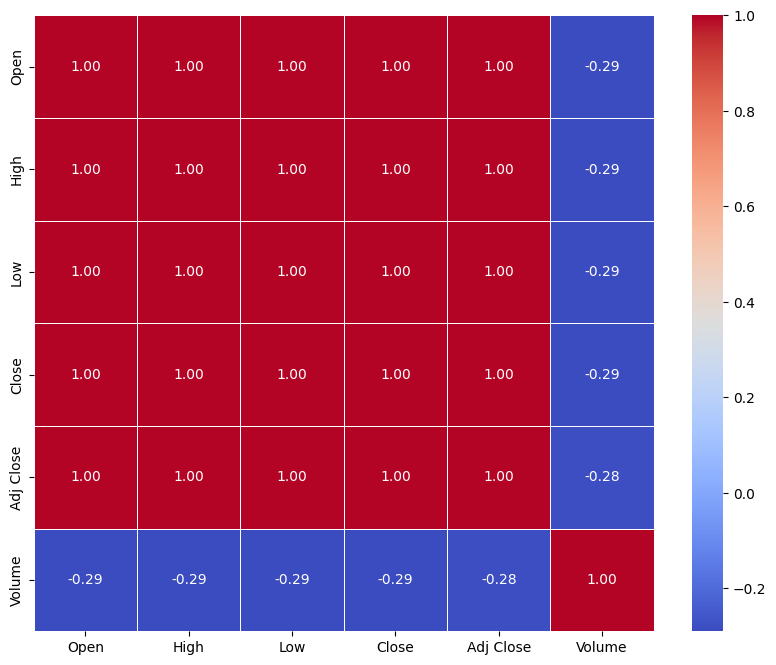

In [28]:
corr_analyser.correlation_matrix(aggregated_data)
